In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
from selenium import webdriver
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

c:\users\user\appdata\local\programs\python\python37\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
web = requests.get('https://www.basketball-reference.com/leagues/NBA_stats_per_game.html')

content = web.content

soup = BeautifulSoup(content,'html.parser')

html = soup.find(name='table',attrs={'id':'stats'})

data = pd.read_html(str(html))[0]

In [13]:
st='Rk	Season	Lg	Age	Ht	Wt	G	MP	FG	FGA	3P	3PA	FT	FTA	ORB	DRB	TRB	AST	STL	BLK	TOV	PF	PTS	FG%	3P%	FT%	Pace	eFG%	TOV%	ORB%	FT/FGA	ORtg'

In [16]:
col=[]

for i in st.split('\t'):
    col.append(i)

In [17]:
data.columns=col

In [25]:
pd.options.display.max_columns=50000
pd.options.display.max_rows=50000

In [26]:
data = data[data['Lg']=='NBA']

In [38]:
for c in data.columns:
    try:
        data[c]=data[c].astype(float)
    except:
        pass

In [40]:
data30 = data.head(30)

In [43]:
data30['Year']=data30['Season'].apply(lambda x:int(x.split('-')[1]))

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [53]:
list3pa = data30['3PA'][::-1]

In [58]:
list3pa = list3pa.reset_index()

In [61]:
plt.style.use('fivethirtyeight')

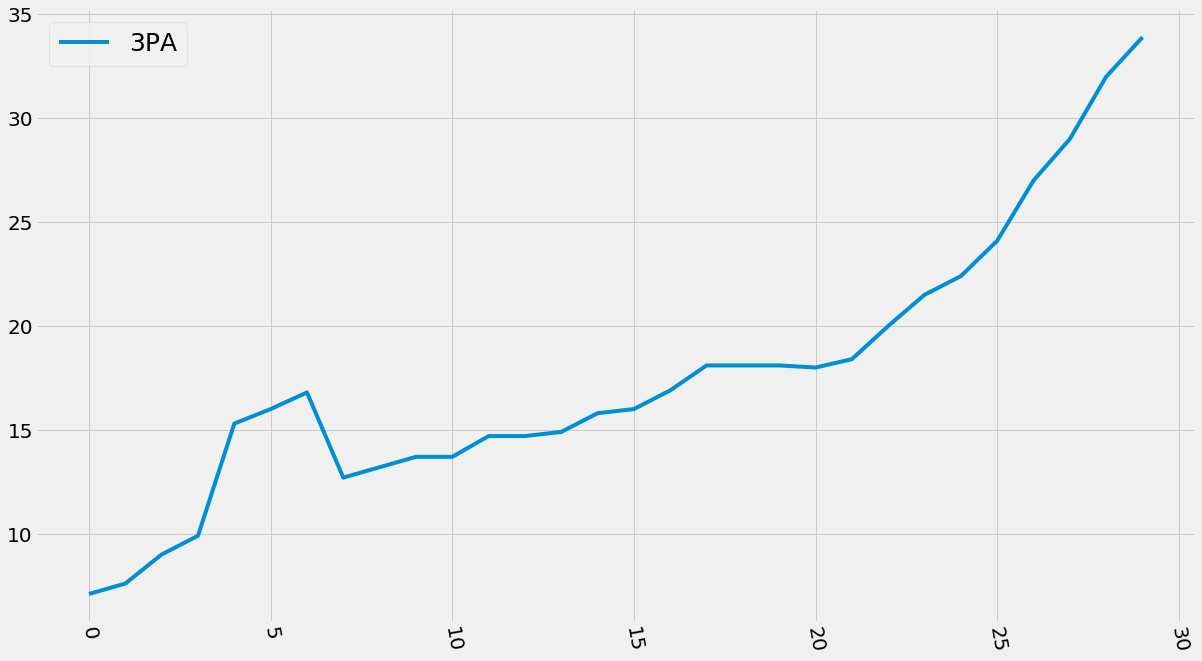

In [62]:
plt.plot(list3pa['3PA'])
plt.xticks(rotation=280)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
# plot.gca().invert_xaxis
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.legend(loc = 0, prop = {'size':25})


In [67]:
def get_table(url,name,ids,idsname):
    web = requests.get(url)

    content = web.content

    soup = BeautifulSoup(content,'html.parser')

    html = soup.find(name=name,attrs={ids:idsname})

    data = pd.read_html(str(html))[0]
    return data

In [68]:
url = 'https://www.basketball-reference.com/leaders/fg3_career.html'
name = 'table'
ids = 'id'
idsname = 'tot'
data = get_table(url,name,ids,idsname)

In [70]:
most_3 = data.head(7)

In [72]:
most_3['Player']=most_3['Player'].apply(lambda x:x.replace('*',''))

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [73]:
most_3

,Rank,Player,3P
0,1.0,Ray Allen,2973
1,2.0,Reggie Miller,2560
2,3.0,Stephen Curry,2495
3,4.0,Kyle Korver,2432
4,5.0,James Harden,2291
5,6.0,Vince Carter,2286
6,7.0,Jason Terry,2282


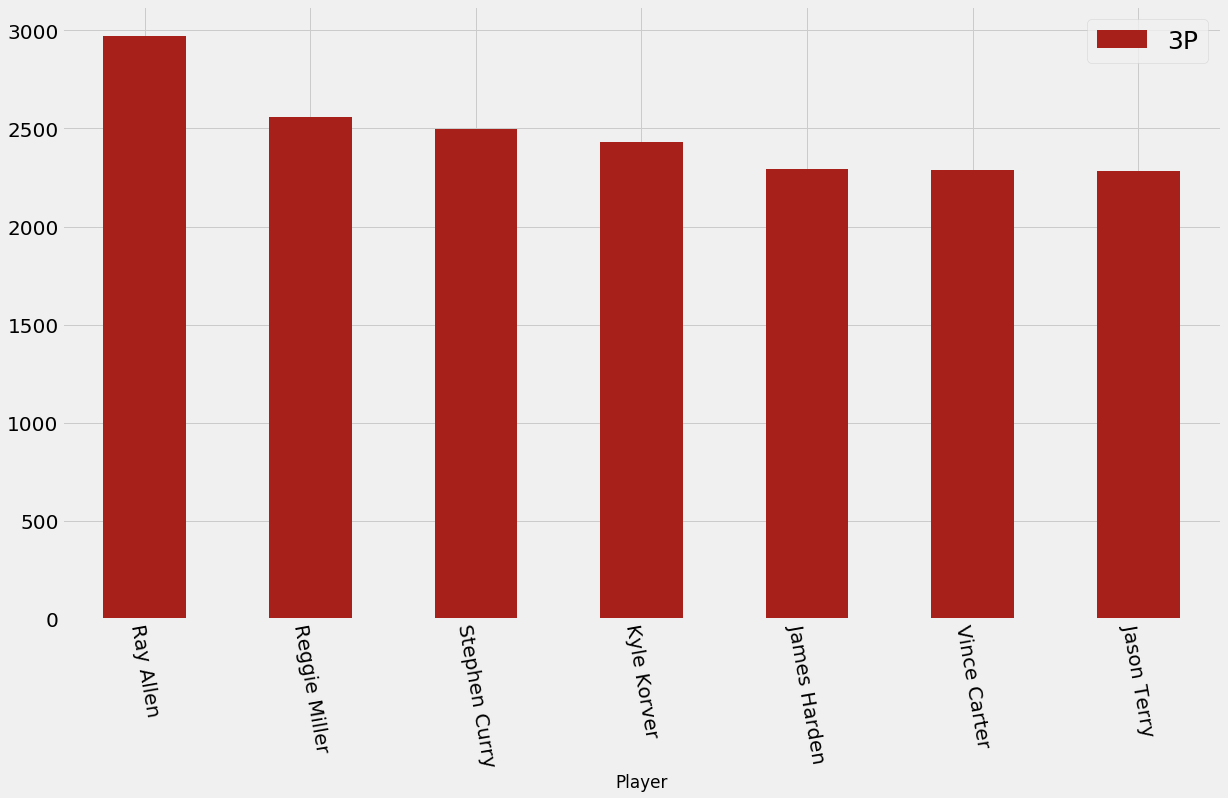

In [79]:
most_3.plot.bar(x = 'Player',y='3P',color='#A8201A')
plt.xticks(rotation=280)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
# plot.gca().invert_xaxis
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc = 0, prop = {'size':25})